# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import math
from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


## 1.1 Reading Data

In [30]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

project_data=project_data.dropna(subset=['teacher_prefix'])

In [31]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109245, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [32]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [34]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [35]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [36]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [37]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase,flags= re.IGNORECASE)
    phrase = re.sub(r"can\'t", "can not", phrase,flags= re.IGNORECASE)
    

    # general
    phrase = re.sub(r"n\'t", " not", phrase,flags= re.IGNORECASE)
    phrase = re.sub(r"\'re", " are", phrase,flags= re.IGNORECASE)
    phrase = re.sub(r"\'s", " is", phrase,flags= re.IGNORECASE)
    phrase = re.sub(r"\'d", " would", phrase,flags= re.IGNORECASE)
    phrase = re.sub(r"\'ll", " will", phrase,flags= re.IGNORECASE)
    phrase = re.sub(r"\'t", " not", phrase,flags= re.IGNORECASE)
    phrase = re.sub(r"\'ve", " have", phrase,flags= re.IGNORECASE)
    phrase = re.sub(r"\'m", " am", phrase,flags= re.IGNORECASE)
    return phrase

In [38]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [39]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109245/109245 [01:05<00:00, 1663.76it/s]


In [12]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [40]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for title in tqdm(project_data['project_title'].values):
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = title.replace('\\t', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(t for t in title.split() if t not in stopwords)
    preprocessed_project_title.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109245/109245 [00:02<00:00, 41695.75it/s]


In [41]:
#cleaning project_grade

project_grade_cat_cleaned=[]

for grade in project_data['project_grade_category'].values:
    grade = grade.replace(' ', '_')
    grade = grade.replace('-', '_to_')
    project_grade_cat_cleaned.append(grade)
    
project_data['project_grade_cat_cleaned'] = project_grade_cat_cleaned


In [42]:
#merging data 

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [43]:
#merging clean titles and essays

project_data['preprocessed_essays'] = preprocessed_essays
project_data['preprocessed_project_title'] = preprocessed_project_title

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [44]:
data= project_data


y = data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)
x=data



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(76471, 22) (76471,)
(32774, 22) (32774,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### Vectorizing Data and Creating Data Matrix

### Vectorizing categorical features:

In [45]:
# Vectorizing categorical features:

#school_state

vectorizer_school_state = CountVectorizer()

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer_school_state.fit_transform(x_train['school_state'].values) # fit has to happen only on train data
x_test_state_ohe = vectorizer_school_state.transform(x_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer_school_state.get_feature_names())
print("="*100)

After vectorizations
(76471, 51) (76471,)
(32774, 51) (32774,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [46]:
# Vectorizing categorical features:

#clean_categories

vectorizer_cat = CountVectorizer()

# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_cat_ohe = vectorizer_cat.fit_transform(x_train['clean_categories'].values) # fit has to happen only on train data
x_test_clean_cat_ohe = vectorizer_cat.transform(x_test['clean_categories'].values)

print("After vectorizations")
print(x_train_clean_cat_ohe.shape, y_train.shape)
print(x_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer_cat.get_feature_names())
print("="*100)

After vectorizations
(76471, 9) (76471,)
(32774, 9) (32774,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [47]:
# Vectorizing categorical features:

#clean_subcategories

vectorizer_subcat = CountVectorizer()

# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_subcat_ohe = vectorizer_subcat.fit_transform(x_train['clean_subcategories'].values) # fit has to happen only on train data
x_test_clean_subcat_ohe = vectorizer_subcat.transform(x_test['clean_subcategories'].values)

print("After vectorizations")
print(x_train_clean_subcat_ohe.shape, y_train.shape)
print(x_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer_subcat.get_feature_names())
print("="*100)

After vectorizations
(76471, 30) (76471,)
(32774, 30) (32774,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [48]:

# Vectorizing categorical features:

#project_grade_category


vectorizer_grade = CountVectorizer()

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer_grade.fit_transform(x_train['project_grade_cat_cleaned'].values) # fit has to happen only on train data
x_test_grade_ohe = vectorizer_grade.transform(x_test['project_grade_cat_cleaned'].values)

print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print("="*100)

After vectorizations
(76471, 4) (76471,)
(32774, 4) (32774,)
['grades_3_to_5', 'grades_6_to_8', 'grades_9_to_12', 'grades_prek_to_2']


In [49]:
# Vectorizing categorical features:

#teacher_prefix


vectorizer_prefix = CountVectorizer()

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer_prefix.fit_transform(x_train['teacher_prefix'].values) # fit has to happen only on train data
x_test_teacher_ohe = vectorizer_prefix.transform(x_test['teacher_prefix'].values)

print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_prefix.get_feature_names())
print("="*100)

After vectorizations
(76471, 5) (76471,)
(32774, 5) (32774,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### Normalizing numerical features:

In [50]:
# Normalizing numerical features:

#price


from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
# normalizer.fit(X_train['price'].values.reshape(-1,1))

x_train_price_norm = normalizer_price.fit_transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = normalizer_price.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


In [51]:
# Normalizing numerical features:

#teacher_number_of_previously_posted_projects


from sklearn.preprocessing import Normalizer
normalizer_post_proj = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
# normalizer.fit(X_train['price'].values.reshape(-1,1))

x_train_post_proj_norm = normalizer_post_proj.fit_transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_post_proj_norm = normalizer_post_proj.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_post_proj_norm.shape, y_train.shape)
print(x_test_post_proj_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


In [52]:
# Normalizing numerical features:

#quantity


from sklearn.preprocessing import Normalizer
normalizer_quantity = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
# normalizer.fit(X_train['price'].values.reshape(-1,1))

x_train_quantity_norm = normalizer_quantity.fit_transform(x_train['quantity'].values.reshape(-1,1))
x_test_quantity_norm = normalizer_quantity.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_quantity_norm.shape, y_train.shape)
print(x_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### Bag of Words(BoW) : Essay 

In [53]:
vectorizer_essay_bow = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)

x_train_essay_bow = vectorizer_essay_bow.fit_transform(x_train['preprocessed_essays'].values)
x_test_essay_bow = vectorizer_essay_bow.transform(x_test['preprocessed_essays'].values)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 5000) (76471,)
(32774, 5000) (32774,)


#### Bag of Words(BoW) : Project_title

In [54]:
vectorizer_title_bow = CountVectorizer(min_df=0)

x_train_title_bow = vectorizer_title_bow.fit_transform(x_train['preprocessed_project_title'].values)
x_test_title_bow = vectorizer_title_bow.transform(x_test['preprocessed_project_title'].values)

print("After vectorizations")
print(x_train_title_bow.shape, y_train.shape)
print(x_test_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 14392) (76471,)
(32774, 14392) (32774,)


#### TFIDF Vectorizer: Essay

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10,ngram_range=(2,2),max_features=5000)

x_train_essay_tfidf = vectorizer_essay_tfidf.fit_transform(x_train['preprocessed_essays'].values)
x_test_essay_tfidf = vectorizer_essay_tfidf.transform(x_test['preprocessed_essays'].values)

print("After vectorizations")
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 5000) (76471,)
(32774, 5000) (32774,)


#### TFIDF Vectorizer: Project_title

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title_tfidf = TfidfVectorizer(min_df=0)

x_train_title_tfidf = vectorizer_title_tfidf.fit_transform(x_train['preprocessed_project_title'].values)
x_test_title_tfidf = vectorizer_title_tfidf.transform(x_test['preprocessed_project_title'].values)

print("After vectorizations")
print(x_train_title_tfidf.shape, y_train.shape)
print(x_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 14392) (76471,)
(32774, 14392) (32774,)


#### Avg W2V Vectorizer: Essay

In [57]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [58]:
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(x_train['preprocessed_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_essays.append(vector)
print("train  vector")
print(len(train_w2v_vectors_essays))
print(len(train_w2v_vectors_essays[0]))
print('='*50)

test_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(x_test['preprocessed_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_essays.append(vector)
print("test  vector")
print(len(test_w2v_vectors_essays))
print(len(test_w2v_vectors_essays[0]))
print('='*50)

100%|██████████████████████████████████████████████████████████████████████████| 76471/76471 [00:17<00:00, 4422.91it/s]


train  vector
76471
300


100%|██████████████████████████████████████████████████████████████████████████| 32774/32774 [00:07<00:00, 4418.08it/s]


test  vector
32774
300


#### Avg W2V Vectorizer: Project_Title

In [59]:
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_title = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_title.append(vector)
print("train  vector")
print(len(train_w2v_vectors_title))
print(len(train_w2v_vectors_title[0]))
print('='*50)


test_w2v_vectors_title = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_title.append(vector)
print("test  vector")
print(len(test_w2v_vectors_title))
print(len(test_w2v_vectors_title[0]))
print('='*50)

100%|█████████████████████████████████████████████████████████████████████████| 76471/76471 [00:00<00:00, 88950.73it/s]


train  vector
76471
300


100%|█████████████████████████████████████████████████████████████████████████| 32774/32774 [00:00<00:00, 86706.65it/s]


test  vector
32774
300


#### TFIDF W2V Vectorizer: Essay

In [60]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit_transform(x_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [61]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))
print('='*50)

100%|███████████████████████████████████████████████████████████████████████████| 76471/76471 [02:01<00:00, 630.33it/s]


Train matrix:
76471
300


In [62]:
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))
print('='*50)

100%|███████████████████████████████████████████████████████████████████████████| 32774/32774 [00:52<00:00, 622.85it/s]


Test matrix:
32774
300


#### TFIDF W2V Vectorizer: Project Title

In [63]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [64]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_title.append(vector)

print("Train matrix:")
print(len(train_tfidf_w2v_title))
print(len(train_tfidf_w2v_title[0]))
print('='*50)

100%|█████████████████████████████████████████████████████████████████████████| 76471/76471 [00:01<00:00, 40039.49it/s]


Train matrix:
76471
300


In [65]:
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_title.append(vector)

print("Test matrix:")
print(len(test_tfidf_w2v_title))
print(len(test_tfidf_w2v_title[0]))
print('='*50)

100%|█████████████████████████████████████████████████████████████████████████| 32774/32774 [00:00<00:00, 40976.50it/s]


Test matrix:
32774
300


### Concatinating all the features

In [66]:
#BAG OF WORDS

from scipy.sparse import hstack
x_bow_tr = hstack((x_train_state_ohe,x_train_clean_cat_ohe, x_train_clean_subcat_ohe, x_train_grade_ohe, x_train_teacher_ohe, \
                x_train_price_norm, x_train_post_proj_norm, x_train_quantity_norm, \
                  x_train_essay_bow,x_train_title_bow)).tocsr()

x_bow_te = hstack((x_test_state_ohe,x_test_clean_cat_ohe, x_test_clean_subcat_ohe, x_test_grade_ohe, x_test_teacher_ohe, \
                x_test_price_norm, x_test_post_proj_norm, x_test_quantity_norm, \
                  x_test_essay_bow,x_test_title_bow)).tocsr()


In [67]:
#TFIDF

from scipy.sparse import hstack
x_tfidf_tr = hstack((x_train_state_ohe,x_train_clean_cat_ohe, x_train_clean_subcat_ohe, x_train_grade_ohe, x_train_teacher_ohe, \
                x_train_price_norm, x_train_post_proj_norm, x_train_quantity_norm, \
                  x_train_essay_tfidf,x_train_title_tfidf)).tocsr()


x_tfidf_te = hstack((x_test_state_ohe,x_test_clean_cat_ohe, x_test_clean_subcat_ohe, x_test_grade_ohe, x_test_teacher_ohe, \
                x_test_price_norm, x_test_post_proj_norm, x_test_quantity_norm, \
                  x_test_essay_tfidf,x_test_title_tfidf)).tocsr()

In [68]:
#AVG W2V

from scipy.sparse import hstack
x_w2v_tr = hstack((x_train_state_ohe,x_train_clean_cat_ohe, x_train_clean_subcat_ohe, x_train_grade_ohe, x_train_teacher_ohe, \
                x_train_price_norm, x_train_post_proj_norm, x_train_quantity_norm, \
                train_w2v_vectors_essays,train_w2v_vectors_title)).tocsr()


x_w2v_te = hstack((x_test_state_ohe,x_test_clean_cat_ohe, x_test_clean_subcat_ohe, x_test_grade_ohe, x_test_teacher_ohe, \
                x_test_price_norm, x_test_post_proj_norm, x_test_quantity_norm, \
                  test_w2v_vectors_essays,test_w2v_vectors_title)).tocsr()

In [69]:
# TFDIF AVG W2V

from scipy.sparse import hstack
x_tfdif_w2v_tr = hstack((x_train_state_ohe,x_train_clean_cat_ohe, x_train_clean_subcat_ohe, x_train_grade_ohe, x_train_teacher_ohe, \
                x_train_price_norm, x_train_post_proj_norm, x_train_quantity_norm, \
                train_tfidf_w2v_essays,train_tfidf_w2v_title)).tocsr()



x_tfdif_w2v_te = hstack((x_test_state_ohe,x_test_clean_cat_ohe, x_test_clean_subcat_ohe, x_test_grade_ohe, x_test_teacher_ohe, \
                x_test_price_norm, x_test_post_proj_norm, x_test_quantity_norm, \
                  test_tfidf_w2v_essays,test_tfidf_w2v_title)).tocsr()

<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying LR brute force on BOW,<font color='red'> SET 1</font>

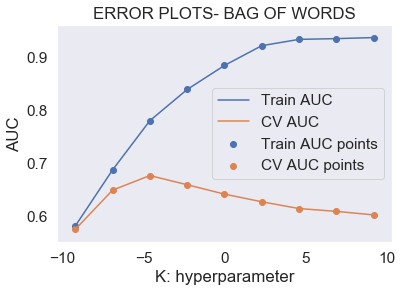

In [63]:
C=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

tuned_parameters = {'C': C}

tuned_parameters2 =  {'C': [math.log(i) for i in C]}

model_lr = RandomizedSearchCV(LogisticRegression(), tuned_parameters, cv=3, scoring='roc_auc')
model_lr.fit(x_bow_tr, y_train)

train_auc= model_lr.cv_results_['mean_train_score']
train_auc_std= model_lr.cv_results_['std_train_score']
cv_auc = model_lr.cv_results_['mean_test_score'] 
cv_auc_std= model_lr.cv_results_['std_test_score']

plt.plot(tuned_parameters2['C'], train_auc, label='Train AUC')
plt.plot(tuned_parameters2['C'], cv_auc, label='CV AUC')

plt.scatter(tuned_parameters2['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters2['C'], cv_auc, label='CV AUC points')

plt.grid()
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS- BAG OF WORDS")
plt.show()

   ### Now Train your Model using Hyper-parameter

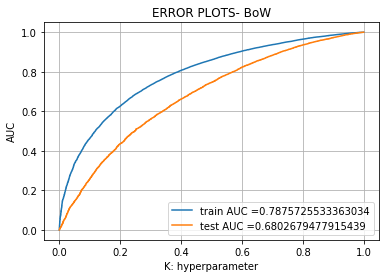

In [134]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


model_lr = LogisticRegression(C=0.01,class_weight='balanced')
model_lr.fit(x_bow_tr, y_train)  # Training Data

y_train_pred = LogisticRegression.predict_proba(model_lr,x_bow_tr)[:,1]   # Predicting Train Data
y_test_pred = LogisticRegression.predict_proba(model_lr,x_bow_te)[:,1]    # Predicting Test Data based on training model

y_train_pred_con = LogisticRegression.predict(model_lr,x_bow_tr)   
y_test_pred_con = LogisticRegression.predict(model_lr,x_bow_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) # GET TRAIN TRUE POSITIVE and FALSE POSITIVE RATES
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred) # GET TEST TRUE POSITIVE and FALSE POSITIVE RATES

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS- BoW")
plt.show()

auc_bow=auc(test_fpr, test_tpr)

In [123]:
#function to get heatmap confusion matrix-- source kaggle https://www.kaggle.com/shashank49/donors-choose-knn
def get_confusion_matrix(y_train,y_train_pred):
    df_cm = pd.DataFrame(confusion_matrix(y_train,y_train_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Train confusion matrix


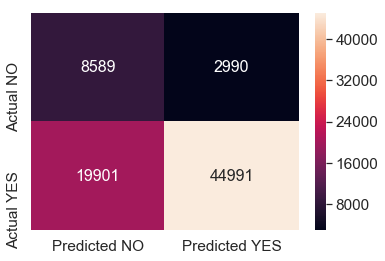

In [136]:
from sklearn.metrics import confusion_matrix

print("Train confusion matrix")
get_confusion_matrix(y_train,y_train_pred_con)
print('='*100)

Test confusion matrix


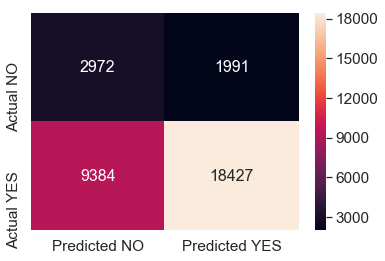

In [137]:
print("Test confusion matrix")
print('='*100)
get_confusion_matrix(y_test,y_test_pred_con)

### 2.4.2 Applying LR brute force on TFIDF,<font color='red'> SET 2</font>

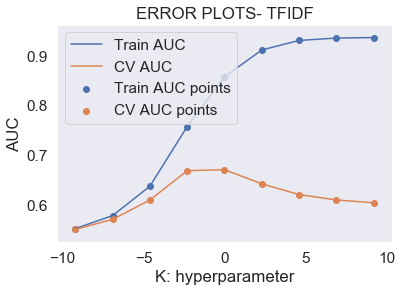

In [65]:
C=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

tuned_parameters = {'C': C}

tuned_parameters2 =  {'C': [math.log(i) for i in C]}

model_lr = RandomizedSearchCV(LogisticRegression(), tuned_parameters, cv=3, scoring='roc_auc')
model_lr.fit(x_tfidf_tr, y_train)

train_auc= model_lr.cv_results_['mean_train_score']
train_auc_std= model_lr.cv_results_['std_train_score']
cv_auc = model_lr.cv_results_['mean_test_score'] 
cv_auc_std= model_lr.cv_results_['std_test_score']

plt.plot(tuned_parameters2['C'], train_auc, label='Train AUC')
plt.plot(tuned_parameters2['C'], cv_auc, label='CV AUC')

plt.scatter(tuned_parameters2['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters2['C'], cv_auc, label='CV AUC points')

plt.grid()
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS- TFIDF")
plt.show()

   ### Now Train your Model using Hyper-parameter

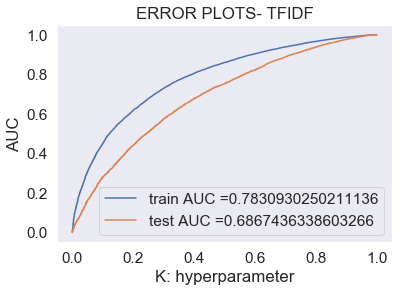

In [138]:
from sklearn.metrics import roc_curve, auc


model_lr = LogisticRegression(C=0.1,class_weight='balanced')
model_lr.fit(x_tfidf_tr, y_train)  # Training Data

y_train_pred = LogisticRegression.predict_proba(model_lr, x_tfidf_tr)[:,1]    # Predicting Train Data
y_test_pred = LogisticRegression.predict_proba(model_lr, x_tfidf_te)[:,1]     # Predicting Test Data based on training model


y_train_pred_con = LogisticRegression.predict(model_lr, x_tfidf_tr)
y_test_pred_con = LogisticRegression.predict(model_lr, x_tfidf_te) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) # GET TRAIN TRUE POSITIVE and FALSE POSITIVE RATES
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred) # GET TEST TRUE POSITIVE and FALSE POSITIVE RATES

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS- TFIDF")
plt.show()

auc_tfidf=auc(test_fpr, test_tpr)

Train confusion matrix


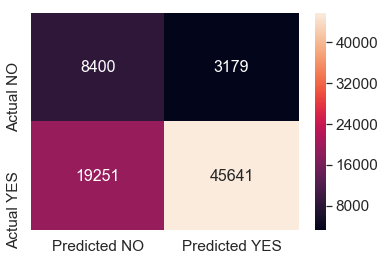

In [139]:
from sklearn.metrics import confusion_matrix

print("Train confusion matrix")
get_confusion_matrix(y_train,y_train_pred_con)
print('='*100)

Test confusion matrix


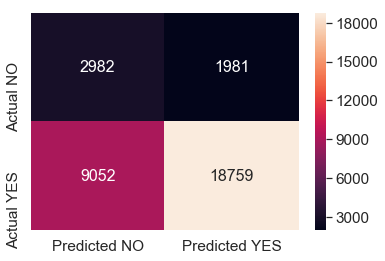

In [140]:
print("Test confusion matrix")
print('='*100)
get_confusion_matrix(y_test,y_test_pred_con)

### 2.4.3 Applying LR brute force on W2V,<font color='red'> SET 3</font>

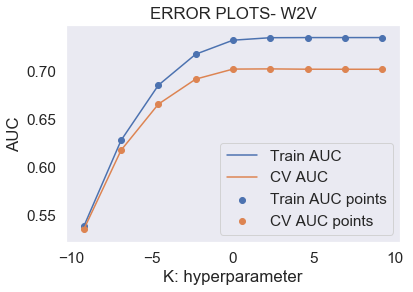

In [66]:
C=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

tuned_parameters = {'C': C}

tuned_parameters2 =  {'C': [math.log(i) for i in C]}

model_lr = RandomizedSearchCV(LogisticRegression(), tuned_parameters, cv=3, scoring='roc_auc')
model_lr.fit(x_w2v_tr, y_train)

train_auc= model_lr.cv_results_['mean_train_score']
train_auc_std= model_lr.cv_results_['std_train_score']
cv_auc = model_lr.cv_results_['mean_test_score'] 
cv_auc_std= model_lr.cv_results_['std_test_score']

plt.plot(tuned_parameters2['C'], train_auc, label='Train AUC')
plt.plot(tuned_parameters2['C'], cv_auc, label='CV AUC')

plt.scatter(tuned_parameters2['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters2['C'], cv_auc, label='CV AUC points')

plt.grid()
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS- W2V")
plt.show()

   ### Now Train your Model using Hyper-parameter

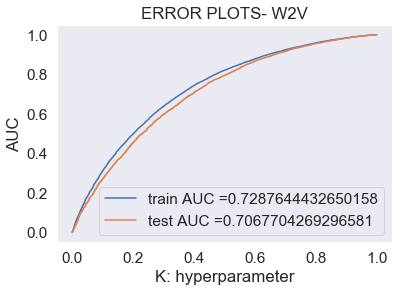

In [141]:
from sklearn.metrics import roc_curve, auc


model_lr = LogisticRegression(C=1,class_weight='balanced')
model_lr.fit(x_w2v_tr, y_train)  # Training Data

y_train_pred = LogisticRegression.predict_proba(model_lr, x_w2v_tr)[:,1]    # Predicting Train Data
y_test_pred = LogisticRegression.predict_proba(model_lr, x_w2v_te) [:,1]    # Predicting Test Data based on training model

y_train_pred_con = LogisticRegression.predict(model_lr, x_w2v_tr)    # Predicting Train Data
y_test_pred_con = LogisticRegression.predict(model_lr, x_w2v_te) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) # GET TRAIN TRUE POSITIVE and FALSE POSITIVE RATES
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred) # GET TEST TRUE POSITIVE and FALSE POSITIVE RATES

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS- W2V")
plt.show()

auc_w2v=auc(test_fpr, test_tpr)

Train confusion matrix


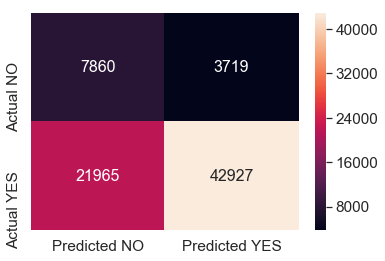

In [142]:
from sklearn.metrics import confusion_matrix

print("Train confusion matrix")
get_confusion_matrix(y_train,y_train_pred_con)
print('='*100)

Test confusion matrix


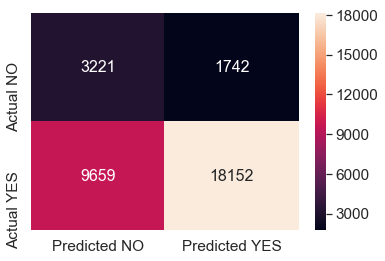

In [143]:
print("Test confusion matrix")
print('='*100)
get_confusion_matrix(y_test,y_test_pred_con)

### 2.4.4 Applying LR brute force on TFIDF W2V,<font color='red'> SET 4</font>

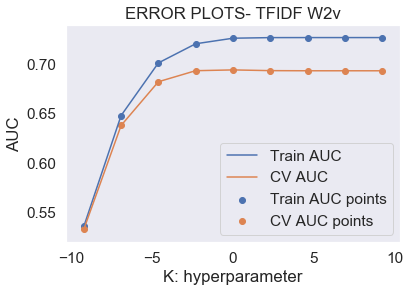

In [67]:
C=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

tuned_parameters = {'C': C}

tuned_parameters2 =  {'C': [math.log(i) for i in C]}

model_lr = RandomizedSearchCV(LogisticRegression(), tuned_parameters, cv=3, scoring='roc_auc')
model_lr.fit(x_tfdif_w2v_tr, y_train)

train_auc= model_lr.cv_results_['mean_train_score']
train_auc_std= model_lr.cv_results_['std_train_score']
cv_auc = model_lr.cv_results_['mean_test_score'] 
cv_auc_std= model_lr.cv_results_['std_test_score']

plt.plot(tuned_parameters2['C'], train_auc, label='Train AUC')
plt.plot(tuned_parameters2['C'], cv_auc, label='CV AUC')

plt.scatter(tuned_parameters2['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters2['C'], cv_auc, label='CV AUC points')

plt.grid()
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS- TFIDF W2v")
plt.show()

   ### Now Train your Model using Hyper-parameter

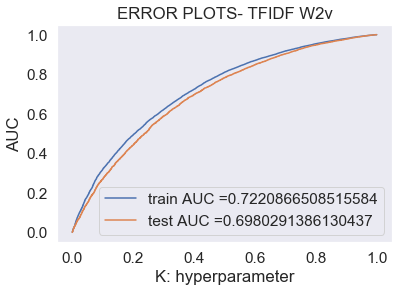

In [144]:
from sklearn.metrics import roc_curve, auc


model_lr = LogisticRegression(C=1,class_weight='balanced')
model_lr.fit(x_tfdif_w2v_tr, y_train)  # Training Data

y_train_pred = LogisticRegression.predict_proba(model_lr, x_tfdif_w2v_tr)[:,1]    # Predicting Train Data
y_test_pred = LogisticRegression.predict_proba(model_lr, x_tfdif_w2v_te)[:,1]     # Predicting Test Data based on training model


y_train_pred_con = LogisticRegression.predict(model_lr, x_tfdif_w2v_tr)   # Predicting Train Data
y_test_pred_con = LogisticRegression.predict(model_lr, x_tfdif_w2v_te) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) # GET TRAIN TRUE POSITIVE and FALSE POSITIVE RATES
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred) # GET TEST TRUE POSITIVE and FALSE POSITIVE RATES

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS- TFIDF W2v")
plt.show()

auc_tfidf_w2v=auc(test_fpr, test_tpr)

Train confusion matrix


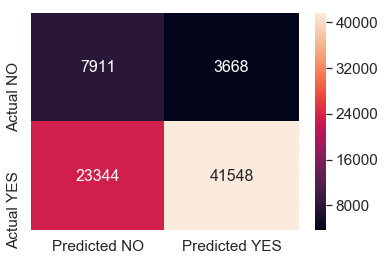

In [145]:
from sklearn.metrics import confusion_matrix

print("Train confusion matrix")
get_confusion_matrix(y_train,y_train_pred_con)
print('='*100)

Test confusion matrix


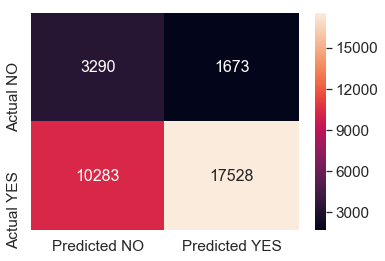

In [146]:
print("Test confusion matrix")
print('='*100)
get_confusion_matrix(y_test,y_test_pred_con)

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

  ### 2.5.1 Get Positive Sentiment score's of each of the essay : numerical data

In [147]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

score_train=[]
for i in x_train['preprocessed_essays'].values:
        score = analyser.polarity_scores(i)
        score_train.append(score.get('pos'))
        
score_test=[]
for i in x_test['preprocessed_essays'].values:
        score = analyser.polarity_scores(i)
        score_test.append(score.get('pos'))
        

score_tr=pd.DataFrame(score_train, columns=['pos_sentiment_score'])
score_te=pd.DataFrame(score_test, columns=['pos_sentiment_score'])

In [148]:
# Normalizing numerical features:

#sentiment scores of project essays

from sklearn.preprocessing import Normalizer
normalizer_essays_scores = Normalizer()

x_train_essay_scores_norm = normalizer_essays_scores.fit_transform(score_tr['pos_sentiment_score'].values.reshape(-1,1))
x_test_essay_scores_norm = normalizer_essays_scores.transform(score_te['pos_sentiment_score'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_essay_scores_norm.shape, y_train.shape)
print(x_test_essay_scores_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


  ### 2.5.2 Get number of words in the title : numerical data

In [149]:
title_word_tr=[]
for i in x_train['preprocessed_project_title'].values:
        cnt = len(i.split())
        title_word_tr.append(cnt)

title_word_te=[]
for j in x_test['preprocessed_project_title'].values:
        cnt = len(i.split())
        title_word_te.append(cnt)
        
title_count_tr=pd.DataFrame(title_word_tr, columns=['count'])
title_count_te=pd.DataFrame(title_word_te, columns=['count'])

In [150]:
# Normalizing numerical features:

#sentiment scores of project essays


from sklearn.preprocessing import Normalizer
normalizer_title_word = Normalizer()

x_train_title_word_norm = normalizer_title_word.fit_transform(title_count_tr['count'].values.reshape(-1,1))
x_test_title_word_norm = normalizer_title_word.transform(title_count_te['count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_title_word_norm.shape, y_train.shape)
print(x_test_title_word_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


  ### 2.5.3 Get number of words in the combine essays : numerical data

In [151]:
essay_word_tr=[]
for i in x_train['preprocessed_essays'].values:
        cnt = len(i.split())
        essay_word_tr.append(cnt)

essay_word_te=[]
for j in x_test['preprocessed_essays'].values:
        cnt = len(i.split())
        essay_word_te.append(cnt)
        
essay_count_tr=pd.DataFrame(essay_word_tr, columns=['count'])
essay_count_te=pd.DataFrame(essay_word_te, columns=['count'])

In [152]:
# Normalizing numerical features:

#sentiment scores of project essays


from sklearn.preprocessing import Normalizer
normalizer_essay_word = Normalizer()

x_train_essay_word_norm = normalizer_essay_word.fit_transform(essay_count_tr['count'].values.reshape(-1,1))
x_test_essay_word_norm = normalizer_essay_word.transform(essay_count_te['count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_essay_word_norm.shape, y_train.shape)
print(x_test_essay_word_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


### Combining all features

In [153]:
#STEP 5

from scipy.sparse import hstack
x_tr = hstack((x_train_state_ohe,x_train_clean_cat_ohe, x_train_clean_subcat_ohe, x_train_grade_ohe, x_train_teacher_ohe, \
                x_train_price_norm, x_train_post_proj_norm, x_train_quantity_norm, \
                  x_train_essay_scores_norm,x_train_title_word_norm,x_train_essay_word_norm)).tocsr()

x_te = hstack((x_test_state_ohe,x_test_clean_cat_ohe, x_test_clean_subcat_ohe, x_test_grade_ohe, x_test_teacher_ohe, \
                x_test_price_norm, x_test_post_proj_norm, x_test_quantity_norm, \
                  x_test_essay_scores_norm,x_test_title_word_norm,x_test_essay_word_norm)).tocsr()

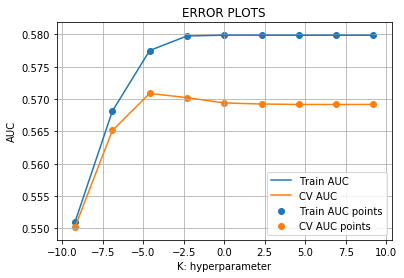

In [90]:
C=[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

tuned_parameters = {'C': C}

tuned_parameters2 =  {'C': [math.log(i) for i in C]}

model_lr = RandomizedSearchCV(LogisticRegression(), tuned_parameters, cv=3, scoring='roc_auc')
model_lr.fit(x_tr, y_train)

train_auc= model_lr.cv_results_['mean_train_score']
train_auc_std= model_lr.cv_results_['std_train_score']
cv_auc = model_lr.cv_results_['mean_test_score'] 
cv_auc_std= model_lr.cv_results_['std_test_score']

plt.plot(tuned_parameters2['C'], train_auc, label='Train AUC')
plt.plot(tuned_parameters2['C'], cv_auc, label='CV AUC')

plt.scatter(tuned_parameters2['C'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters2['C'], cv_auc, label='CV AUC points')

plt.grid()
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

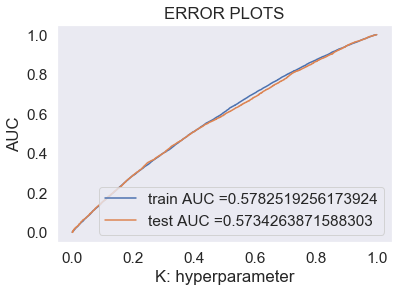

In [163]:
from sklearn.metrics import roc_curve, auc


model_lr = LogisticRegression(C=1,class_weight='balanced')
model_lr.fit(x_tr, y_train)  # Training Data

y_train_pred = LogisticRegression.predict_proba(model_lr, x_tr)[:,1]    # Predicting Train Data
y_test_pred = LogisticRegression.predict_proba(model_lr, x_te)[:,1]     # Predicting Test Data based on training model


y_train_pred_con = LogisticRegression.predict(model_lr, x_tr)  
y_test_pred_con = LogisticRegression.predict(model_lr, x_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) # GET TRAIN TRUE POSITIVE and FALSE POSITIVE RATES
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred) # GET TEST TRUE POSITIVE and FALSE POSITIVE RATES

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

auc=auc(test_fpr, test_tpr)

Train confusion matrix


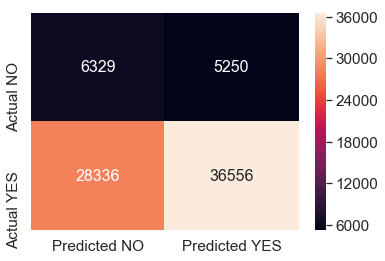

In [164]:
from sklearn.metrics import confusion_matrix

print("Train confusion matrix")
get_confusion_matrix(y_train,y_train_pred_con)
print('='*100)

Test confusion matrix


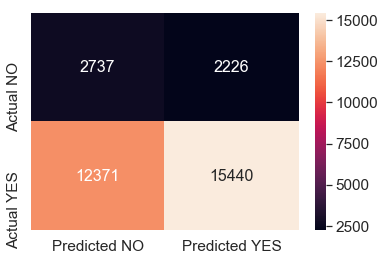

In [165]:
print("Test confusion matrix")
get_confusion_matrix(y_test,y_test_pred_con)
print('='*100)

<h1>3. Conclusion</h1>

In [166]:
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper-Parameter", "AUC"]

x.add_row(["BOW", "Brute", 0.01, auc_bow])
x.add_row(["TFIDF", "Brute", 0.1, auc_tfidf])
x.add_row(["AVG-W2V", "Brute", 1, auc_w2v])
x.add_row(["TFIDF-W2V", "Brute", 1, auc_tfidf_w2v])
x.add_row(["NUMERICAL VALUES", "Brute", 1, auc])


print(x)

+------------------+-------+-----------------+--------------------+
|    Vectorizer    | Model | Hyper-Parameter |        AUC         |
+------------------+-------+-----------------+--------------------+
|       BOW        | Brute |       0.01      | 0.6802679477915439 |
|      TFIDF       | Brute |       0.1       | 0.6867436338603266 |
|     AVG-W2V      | Brute |        1        | 0.7067704269296581 |
|    TFIDF-W2V     | Brute |        1        | 0.6980291386130437 |
| NUMERICAL VALUES | Brute |        1        | 0.5734263871588303 |
+------------------+-------+-----------------+--------------------+
